In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [6]:
temp_dataset = pd.read_csv("Exercise-CarData.csv")
temp_dataset[temp_dataset['KM'] == '??']

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
64,64,17950,27.0,??,Petrol,97,1.0,0,1400,5,1110
91,91,22250,20.0,??,Diesel,90,1.0,0,2000,3,1260
112,112,24950,8.0,??,Diesel,116,1.0,0,2000,5,1320
125,125,21750,16.0,??,Petrol,110,1.0,0,1600,5,1130
131,131,15950,20.0,??,Petrol,97,1.0,0,1400,5,1110
398,398,10500,55.0,??,Petrol,110,1.0,0,1600,4,1035
491,491,10750,54.0,??,Petrol,110,1.0,0,1600,5,1075
1049,1049,6750,77.0,??,Diesel,72,1.0,0,2000,4,1100
1120,1120,7350,72.0,??,Petrol,86,1.0,0,1300,3,1015


In [7]:
temp_dataset[temp_dataset['HP'] == '????']

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,??,Diesel,????,NaN,0,2000,3,1245
9,9,12950,23.0,71138,Diesel,????,NaN,0,1900,3,1105
15,15,22000,28.0,18739,Petrol,????,0.0,0,1800,3,1185
631,631,8950,67.0,127000,Diesel,????,1.0,0,2000,5,1135
638,638,10450,64.0,120400,NaN,????,0.0,0,1600,5,1090
1245,1245,7990,77.0,80486,Petrol,????,1.0,0,1600,5,1070


**Observation**
- As we can see few dataframe contains inappropriate data which needs to be handled while preprocessing.
- The best way is to replace all such values by NaN.
- So, we will use na_values attritube in pd.read()

In [8]:
dataset = pd.read_csv("Exercise-CarData.csv", na_values = ['??', '????']) 
print("Number of rows and cokumns:", dataset.shape)
dataset.head()

Number of rows and cokumns: (1436, 11)


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [9]:
dataset.columns.tolist()

['Unnamed: 0',
 'Price',
 'Age',
 'KM',
 'FuelType',
 'HP',
 'MetColor',
 'Automatic',
 'CC',
 'Doors',
 'Weight']

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


**Observation:**
- Unnamed: 0 column is just the index number. So, we can drop this column in future.
- Apart from this, Doors feature should be of type int64 but it is object. Thus, we need to observe it more carefully and handle it properly while preprocessing.

In [11]:
dataset.drop('Unnamed: 0',axis = 1, inplace = True)

In [12]:
dataset.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

**Observations:**
- Age has 100 NaN values
- FuelType 100 NaN
- MetColor 150 NaN
- Further, the 15 values in KM were '??' before now it is NaN because of na_values.
- Same with 6 NaN values in HP

In [13]:
dataset['Doors'].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

*Let's change the string values with it's appropriate number and converting datatype to int64.*

In [14]:
dataset['Doors'] = dataset['Doors'].map({'three':3, '3':3, '5':5, '4':4, '2':2, 'four':4, 'five':5})
dataset['Doors'].unique()

array([3, 5, 4, 2])

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 112.3+ KB


**Now, things look better than before**

### Handling null (missing) values

In [16]:
# droping rows with all null values

dataset.dropna(how = "all", inplace = True)
print("Number of rows and cokumns:", dataset.shape)

Number of rows and cokumns: (1436, 10)


*So, no rows had all null values*

In [17]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [18]:
dataset.describe(include = 'object')

,FuelType
count,1336
unique,3
top,Petrol
freq,1177


**But still we have one object type/categorical data left. We will convert this into numerical data before replacing missing values**

In [19]:
print("Unique Fuel Type values:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Unique Fuel Type values: ['Diesel' nan 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

As the instance is categorical, we will replace NaN with the mode value. Here, `Diesel`.

In [20]:
dataset['FuelType'].fillna('Diesel', inplace = True)
print("Unique Fuel Type values:",dataset['FuelType'].unique())
print("Count of each type:")
dataset['FuelType'].value_counts()

Unique Fuel Type values: ['Diesel' 'Petrol' 'CNG']
Count of each type:


Petrol    1177
Diesel     244
CNG         15
Name: FuelType, dtype: int64

In [21]:
#Let's do Label Encoding
le = LabelEncoder()
dataset['FuelType'] = le.fit_transform(dataset['FuelType'])
print("Unique Fuel Type values:",dataset['FuelType'].unique())
dataset.head(10)

Unique Fuel Type values: [1 2 0]


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,1,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,1,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,1,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,1,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,1,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,1,90.0,0.0,0,2000,3,1170
6,16900,27.0,NaN,1,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,1,90.0,1.0,0,2000,3,1245
8,21500,27.0,19700.0,2,192.0,0.0,0,1800,3,1185
9,12950,23.0,71138.0,1,NaN,NaN,0,1900,3,1105


**Replacing all NaN values with respective mean using imputer**

In [22]:
dataset = dataset.reindex(columns = ['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 
                                     'Weight', 'Price'])
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

print("X:\n",X)
print("\n\nY:\n",Y)

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

X:
 [[2.3000e+01 4.6986e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.3000e+01 7.2937e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 [2.4000e+01 4.1711e+04 1.0000e+00 ... 2.0000e+03 3.0000e+00 1.1650e+03]
 ...
 [       nan 1.7016e+04 2.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.0000e+01        nan 1.0000e+00 ... 1.3000e+03 3.0000e+00 1.0150e+03]
 [7.6000e+01 1.0000e+00 2.0000e+00 ... 1.6000e+03 5.0000e+00 1.1140e+03]]


Y:
 [13500 13750 13950 ...  8500  7250  6950]


In [23]:
# Fitting the data, function learns the stats 
imputer = imputer.fit(X[:,:]) 
  
# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
X[:,:] = imputer.transform(X[:,:]) 
  
# filling the missing value with mean 
print("\n\nNew Input with Mean Value for NaN : \n\n", X) 



New Input with Mean Value for NaN : 

 [[2.30000000e+01 4.69860000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.30000000e+01 7.29370000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 [2.40000000e+01 4.17110000e+04 1.00000000e+00 ... 2.00000000e+03
  3.00000000e+00 1.16500000e+03]
 ...
 [5.56721557e+01 1.70160000e+04 2.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.00000000e+01 6.86472400e+04 1.00000000e+00 ... 1.30000000e+03
  3.00000000e+00 1.01500000e+03]
 [7.60000000e+01 1.00000000e+00 2.00000000e+00 ... 1.60000000e+03
  5.00000000e+00 1.11400000e+03]]


### Handling using pandas

In [24]:
dataset.isna().sum()

Age          100
KM            15
FuelType       0
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
Price          0
dtype: int64

In [25]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['KM'].fillna(dataset['KM'].mean(), inplace = True)
dataset['HP'].fillna(dataset['HP'].mean(), inplace = True)
dataset['MetColor'].fillna(dataset['MetColor'].mean(), inplace = True)

In [26]:
dataset.head(20)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price
0,23.0,46986.000000,1,90.000000,1.000000,0,2000,3,1165,13500
1,23.0,72937.000000,1,90.000000,1.000000,0,2000,3,1165,13750
2,24.0,41711.000000,1,90.000000,0.674961,0,2000,3,1165,13950
3,26.0,48000.000000,1,90.000000,0.000000,0,2000,3,1165,14950
4,30.0,38500.000000,1,90.000000,0.000000,0,2000,3,1170,13750
5,32.0,61000.000000,1,90.000000,0.000000,0,2000,3,1170,12950
6,27.0,68647.239972,1,101.478322,0.674961,0,2000,3,1245,16900
7,30.0,75889.000000,1,90.000000,1.000000,0,2000,3,1245,18600
8,27.0,19700.000000,2,192.000000,0.000000,0,1800,3,1185,21500
9,23.0,71138.000000,1,101.478322,0.674961,0,1900,3,1105,12950


In [27]:
dataset.isna().sum()

Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Price        0
dtype: int64

**Observations:**
- All NaN are handled properly

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1436 non-null   float64
 1   KM         1436 non-null   float64
 2   FuelType   1436 non-null   int64  
 3   HP         1436 non-null   float64
 4   MetColor   1436 non-null   float64
 5   Automatic  1436 non-null   int64  
 6   CC         1436 non-null   int64  
 7   Doors      1436 non-null   int64  
 8   Weight     1436 non-null   int64  
 9   Price      1436 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 123.4 KB


### Feature selection based on correlation

In [29]:
dataset_new = dataset.iloc[:,0:8]
dataset_new.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
0,23.0,46986.0,1,90.0,1.000000,0,2000,3
1,23.0,72937.0,1,90.0,1.000000,0,2000,3
2,24.0,41711.0,1,90.0,0.674961,0,2000,3
3,26.0,48000.0,1,90.0,0.000000,0,2000,3
4,30.0,38500.0,1,90.0,0.000000,0,2000,3


In [30]:
corr = dataset_new.corr()
corr.head(8)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors
Age,1.000000,0.495199,0.055345,-0.152946,-0.091331,0.030931,-0.116255,-0.151785
KM,0.495199,1.000000,-0.332595,-0.332984,-0.088587,-0.080743,0.296281,-0.036021
FuelType,0.055345,-0.332595,1.000000,0.356670,-0.006320,0.059933,-0.520432,-0.011948
HP,-0.152946,-0.332984,0.356670,1.000000,0.060990,0.013753,0.053466,0.096938
MetColor,-0.091331,-0.088587,-0.006320,0.060990,1.000000,-0.013167,0.027524,0.081540
Automatic,0.030931,-0.080743,0.059933,0.013753,-0.013167,1.000000,-0.069321,-0.027654
CC,-0.116255,0.296281,-0.520432,0.053466,0.027524,-0.069321,1.000000,0.126768
Doors,-0.151785,-0.036021,-0.011948,0.096938,0.081540,-0.027654,0.126768,1.000000


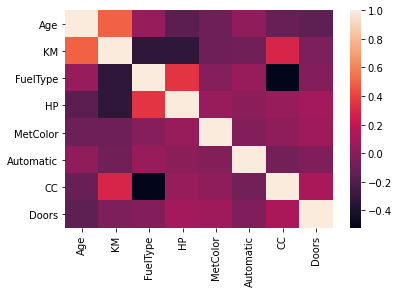

In [31]:
sns.heatmap(corr)

**Observations**
- No two feature has high correlation (>=0.9) with other. So, we can't remove any attribute.